<a href="https://colab.research.google.com/github/mtarique/stock-predictive-analytics/blob/main/yfinance_scrap_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title
Real-Time Stock Analysis and Prediction Using Python and Yahoo Finance

# Description
This project retrieves stock data from Yahoo Finance using web scraping or the YFinance API (only if web scraping becomes unavailable). By leveraging historical and real-time stock data, along with machine learning techniques in Python, the project utilizes libraries such as Pandas for data manipulation, NumPy for numerical operations, and Matplotlib for data visualization. The goal is to predict future stock performance, enabling investors to make informed decisions on which stocks to buy today.



https://chatgpt.com/share/6700e800-3c08-800a-b042-b30b6979da2a

To scrape stock data from Yahoo Finance and perform basic analysis for Indian stocks, we can use the following Python libraries:

**yfinance:** A Python wrapper around Yahoo Finance’s API for easy data retrieval.

**pandas:** For data manipulation and analysis.

**matplotlib/seaborn:** For basic visualization (optional, but recommended).

Below is a Python script that demonstrates how to:

Retrieve stock data from Yahoo Finance using yfinance.
Perform basic analysis like calculating moving averages and visualizing the stock price.

**Prerequisites**:

```
pip install yfinance pandas matplotlib seaborn

```

# Explanation:

**get_stock_data:**

Uses the yfinance library to download historical stock data. For Indian stocks listed on NSE, you append .NS to the stock symbol. For example, TCS.NS is the symbol for Tata Consultancy Services on the National Stock Exchange (NSE).

**basic_analysis:**

Moving Averages: It calculates both 50-day and 200-day moving averages for the stock's adjusted closing price.
Daily Returns: Computes the percentage change in the stock's adjusted closing price from one day to the next.
Visualization: Plots the stock’s adjusted closing price along with moving averages and the distribution of daily returns.

**analyze_stock:**

Downloads data for the stock symbol you pass to it and calls the basic_analysis function for analysis.

**Example Output:**

**Stock Price and Moving Averages Plot:** A line graph showing the stock's adjusted closing price, 50-day moving average, and 200-day moving average.

**Daily Returns Distribution:** A histogram showing the distribution of daily returns, useful for understanding the volatility of the stock.

**Things to Explore:**
You can replace TCS.NS with other Indian stock symbols like:

Reliance Industries: RELIANCE.NS

Infosys: INFY.NS

HDFC Bank: HDFCBANK.NS

Experiment with different time periods by adjusting the start_date and end_date.

Would you like to add any specific analysis (e.g., volatility, trend detection) or customization to this script?


[*********************100%***********************]  1 of 1 completed

Fetching data for TCS.NS from Yahoo Finance...

=== Summary Statistics ===
              Open         High          Low        Close    Adj Close  \
count   992.000000   992.000000   992.000000   992.000000   992.000000   
mean   3098.827620  3128.295608  3067.890029  3097.794100  2946.870126   
std     550.687733   549.473185   549.859258   550.609077   556.334202   
min    1559.699951  1685.449951  1506.050049  1636.349976  1512.788452   
25%    2906.750000  2935.337524  2879.750000  2909.162537  2714.973083   
50%    3250.000000  3274.500000  3220.875000  3250.650024  3110.702148   
75%    3458.325073  3486.024963  3431.912537  3460.924927  3345.802856   
max    4033.949951  4043.000000  3980.000000  4019.149902  3815.438721   

             Volume        50_MA       200_MA  Daily_Return  
count  9.920000e+02   943.000000   793.000000    991.000000  
mean   2.759584e+06  2955.185577  3019.284148      0.000768  
std    1.720403e+06   526.365022   394.003566      0.015895  
min    2.6

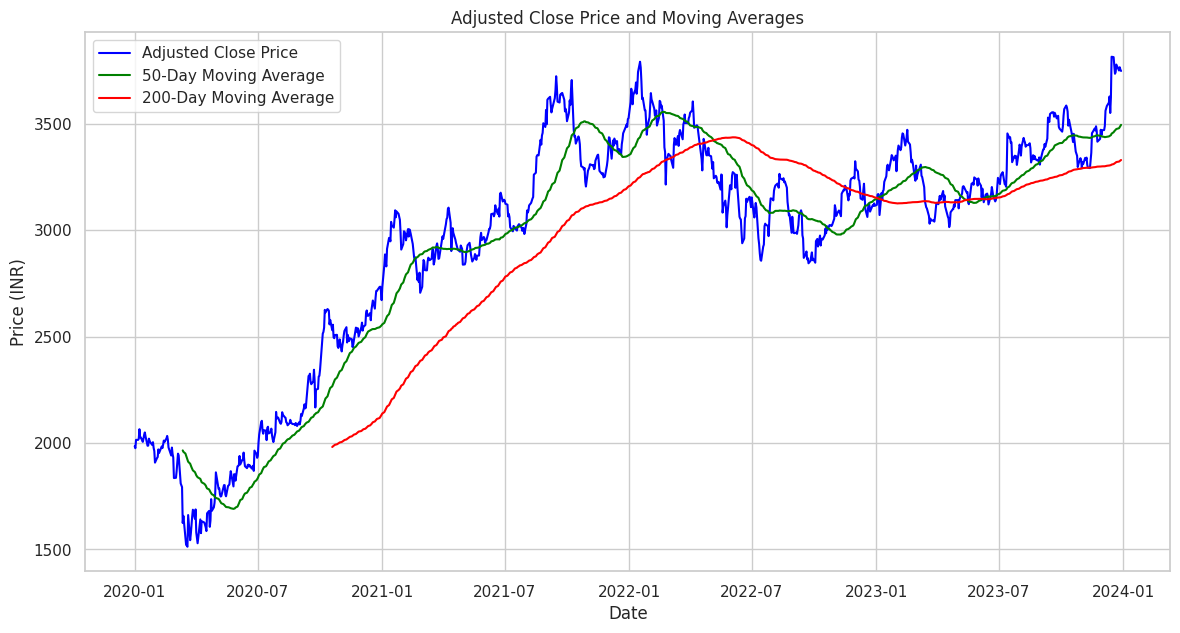

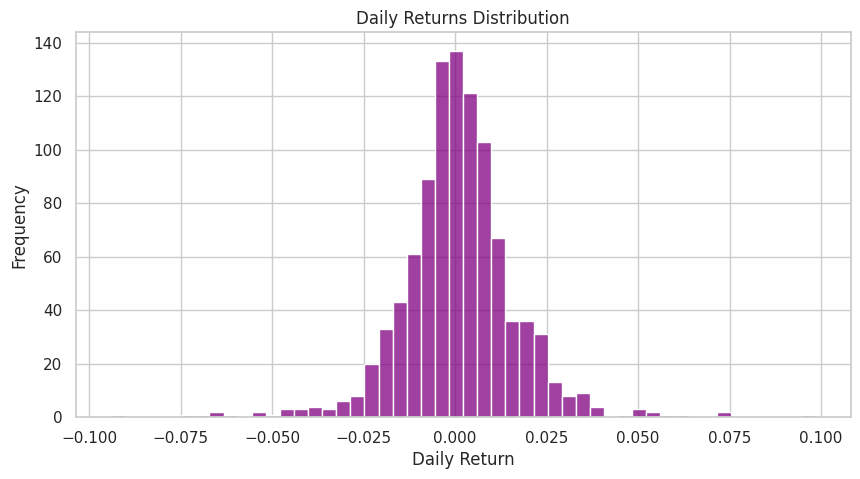

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Function to download stock data for a specific Indian stock
def get_stock_data(stock_symbol, start_date, end_date):
    """
    Download stock data from Yahoo Finance.
    :param stock_symbol: Stock symbol (e.g., 'TCS.NS' for Tata Consultancy Services)
    :param start_date: Start date of data (YYYY-MM-DD)
    :param end_date: End date of data (YYYY-MM-DD)
    :return: DataFrame with stock data
    """
    stock = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock

# Function for basic analysis
def basic_analysis(stock_df):
    """
    Perform basic analysis like calculating moving averages and returns.
    :param stock_df: DataFrame containing stock data
    :return: None
    """
    # Calculate moving averages (50-day and 200-day)
    stock_df['50_MA'] = stock_df['Adj Close'].rolling(window=50).mean()
    stock_df['200_MA'] = stock_df['Adj Close'].rolling(window=200).mean()

    # Calculate daily returns
    stock_df['Daily_Return'] = stock_df['Adj Close'].pct_change()

    print("\n=== Summary Statistics ===")
    print(stock_df.describe())

    # Plot Adjusted Close Price and Moving Averages
    plt.figure(figsize=(14, 7))
    plt.plot(stock_df['Adj Close'], label='Adjusted Close Price', color='blue')
    plt.plot(stock_df['50_MA'], label='50-Day Moving Average', color='green')
    plt.plot(stock_df['200_MA'], label='200-Day Moving Average', color='red')
    plt.title('Adjusted Close Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.show()

    # Plot Daily Returns
    plt.figure(figsize=(10, 5))
    sns.histplot(stock_df['Daily_Return'].dropna(), bins=50, color='purple')
    plt.title('Daily Returns Distribution')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

# Function to analyze a specific stock
def analyze_stock(stock_symbol, start_date='2020-01-01', end_date='2023-01-01'):
    """
    Download data and perform basic analysis for the given stock.
    :param stock_symbol: Stock symbol (e.g., 'TCS.NS')
    :param start_date: Start date for analysis
    :param end_date: End date for analysis
    :return: None
    """
    # Step 1: Get stock data
    print(f"Fetching data for {stock_symbol} from Yahoo Finance...")
    stock_df = get_stock_data(stock_symbol, start_date, end_date)

    # Step 2: Perform basic analysis
    basic_analysis(stock_df)

# Example: Analyzing Tata Consultancy Services (TCS) stock
if __name__ == "__main__":
    # Example stock symbols for Indian companies
    stock_symbol = 'TCS.NS'  # Tata Consultancy Services (TCS) on NSE
    analyze_stock(stock_symbol, start_date='2020-01-01', end_date='2024-01-01')


To enhance your stock analysis with predictive capabilities, we can incorporate a simple machine learning model to predict which stocks might be a good buy today based on historical data and technical indicators. Here’s a step-by-step approach:

# Step-by-Step Approach
Data Collection: Scrape historical stock prices along with relevant indicators.

Data Preprocessing: Clean the data and create features for the model.

Model Training: Train a simple predictive model.

Prediction: Predict stock performance for today.

# Required Libraries

You'll need to install additional libraries for machine learning and data handling. You can install them using:

```
pip install pandas scikit-learn yfinance
```

# Complete Python Script
Here’s a complete script that scrapes historical stock data, prepares it for prediction, and uses a simple linear regression model to predict which stocks might be good buys today.


# Explanation of the Script
1. Data Collection: The get_historical_data function uses the
yfinance library to download historical stock prices.

2. Data Preprocessing: The prepare_data function calculates the percentage price change and sets up the target variable for prediction (the price change for the next day).

3. Predictive Model:
* We split the data into training and testing sets.
* A simple Linear Regression model is trained on the features.


4. Decision Making: The decide_which_to_buy function provides a recommendation based on the predicted price change percentage for the next day.

5. Final Output: The script prints recommendations indicating whether to "Buy" or "Hold" for each stock based on the model's predictions.

# Important Notes
* Model Limitations: This is a very basic linear regression model and may not yield accurate predictions. For more sophisticated predictions, you might want to explore advanced machine learning techniques like Random Forests, XGBoost, or LSTM for time series data.

* Feature Engineering: You can improve predictions by adding more features like moving averages, RSI (Relative Strength Index), MACD (Moving Average Convergence Divergence), or other technical indicators.

* Market Trends: Always consider broader market trends and news that might affect stock prices before making any investment decisions.

# Next Steps
You can run this script and see the recommendations it generates. Let me know if you want to incorporate specific indicators, add more features, or dive deeper into analysis!


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape stock data from Yahoo Finance
def get_stock_data(ticker):
    url = f'https://finance.yahoo.com/quote/{ticker}?p={ticker}'
    headers = {"User-Agent": "Mozilla/5.0"}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the stock price
    price_section = soup.find('fin-streamer', {'data-field': 'regularMarketPrice'})
    stock_price = float(price_section.text.replace(',', '')) if price_section else None

    # Extract other data points like P/E ratio
    pe_ratio_section = soup.find('td', {'data-test': 'PE_RATIO-value'})
    pe_ratio = pe_ratio_section.text if pe_ratio_section else 'N/A'

    # Return the extracted data
    return {'Stock': ticker, 'Price': stock_price, 'P/E Ratio': pe_ratio}

# Function to analyze stock data
def analyze_stock_data(df):
    # Calculate percentage change
    df['Price Change %'] = df['Price'].pct_change() * 100

    # Identify basic trends (upward/downward)
    df['Trend'] = df['Price Change %'].apply(lambda x: 'Upward' if x > 0 else 'Downward')

    return df

# List of Indian stock tickers (e.g., NSE/BSE symbols)
indian_stocks = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'SUZLON.NS']

# Collect stock data
stock_data = [get_stock_data(stock) for stock in indian_stocks]

# Create a pandas DataFrame
df = pd.DataFrame(stock_data)

# Perform basic analysis
df_analyzed = analyze_stock_data(df)

# Display the DataFrame
print(df_analyzed)


         Stock    Price P/E Ratio  Price Change %     Trend
0       TCS.NS  4252.25       N/A             NaN  Downward
1      INFY.NS  1918.15       N/A      -54.890940  Downward
2  RELIANCE.NS  2773.05       N/A       44.568986    Upward
3  HDFCBANK.NS  1657.65       N/A      -40.222859  Downward
4    SUZLON.NS    74.67       N/A      -95.495430  Downward


To enhance your stock analysis with predictive capabilities, we can incorporate a simple machine learning model to predict which stocks might be a good buy today based on historical data and technical indicators. Here’s a step-by-step approach:

# Step-by-Step Approach

1. Data Collection: Scrape historical stock prices along with relevant indicators.
2. Data Preprocessing: Clean the data and create features for the model.
3. Model Training: Train a simple predictive model.
4. Prediction: Predict stock performance for today.

# Required Libraries
You'll need to install additional libraries for machine learning and data handling. You can install them using:

```
pip install pandas scikit-learn yfinance
```

# Complete Python Script
Here’s a complete script that scrapes historical stock data, prepares it for prediction, and uses a simple linear regression model to predict which stocks might be good buys today.

# Explanation of the Script
1. Data Collection: The get_historical_data function uses the yfinance library to download historical stock prices.

2. Data Preprocessing: The prepare_data function calculates the percentage price change and sets up the target variable for prediction (the price change for the next day).

3. Predictive Model:
We split the data into training and testing sets.
A simple Linear Regression model is trained on the features.

4. Decision Making: The decide_which_to_buy function provides a recommendation based on the predicted price change percentage for the next day.

5. Final Output: The script prints recommendations indicating whether to "Buy" or "Hold" for each stock based on the model's predictions.

# Important Notes
 * Model Limitations: This is a very basic linear regression model and may not yield accurate predictions. For more sophisticated predictions, you might want to explore advanced machine learning techniques like Random Forests, XGBoost, or LSTM for time series data.

 * Feature Engineering: You can improve predictions by adding more features like moving averages, RSI (Relative Strength Index), MACD (Moving Average Convergence Divergence), or other technical indicators.

 * Market Trends: Always consider broader market trends and news that might affect stock prices before making any investment decisions.

# Next Steps
You can run this script and see the recommendations it generates. Let me know if you want to incorporate specific indicators, add more features, or dive deeper into analysis!









In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Function to get historical data
def get_historical_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to prepare data for modeling
def prepare_data(df):
    df['Price Change'] = df['Close'].diff()
    df['Price Change %'] = (df['Price Change'] / df['Close'].shift(1)) * 100
    df['Target'] = df['Price Change %'].shift(-1)  # Predict the next day's change

    # Drop rows with NaN values
    df = df.dropna()

    return df[['Close', 'Price Change %', 'Target']]

# Function to predict stock performance
def predict_stock_performance(stock_data):
    X = stock_data[['Close', 'Price Change %']]
    y = stock_data['Target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Return predictions
    return predictions, y_test

# Function to decide which stock to buy
def decide_which_to_buy(predictions, actuals):
    results = pd.DataFrame({'Predicted': predictions, 'Actual': actuals})
    results['Recommendation'] = np.where(results['Predicted'] > 0, 'Buy', 'Hold')
    return results

# List of Indian stock tickers
indian_stocks = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS']

# Set the date range for historical data
start_date = '2023-01-01'
end_date = '2024-10-01'

# Dictionary to hold predictions and recommendations
recommendations = {}

for stock in indian_stocks:
    historical_data = get_historical_data(stock, start_date, end_date)
    prepared_data = prepare_data(historical_data)

    # Predict stock performance
    predictions, actuals = predict_stock_performance(prepared_data)

    # Decide which stocks to buy
    result = decide_which_to_buy(predictions, actuals)

    # Get the last prediction for today's decision
    recommendations[stock] = result.iloc[-1]['Recommendation']

# Display the recommendations
print("Stock Recommendations for Today:")
for stock, recommendation in recommendations.items():
    print(f"{stock}: {recommendation}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Stock Recommendations for Today:
TCS.NS: Buy
INFY.NS: Hold
RELIANCE.NS: Buy
HDFCBANK.NS: Buy
